In [19]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 필수 라이브러리
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

data_path = 'data/processed_datasets.csv'
data = pd.read_csv(data_path)
raw_data = pd.read_csv('data/datasets.csv')

In [14]:
# 타겟값 변환
raw_data['Attrition'] = raw_data['Attrition'].map({'Yes': 1, 'No': 0})
raw_data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
raw_data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


c:\Users\jhwoo\anaconda3\envs\ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


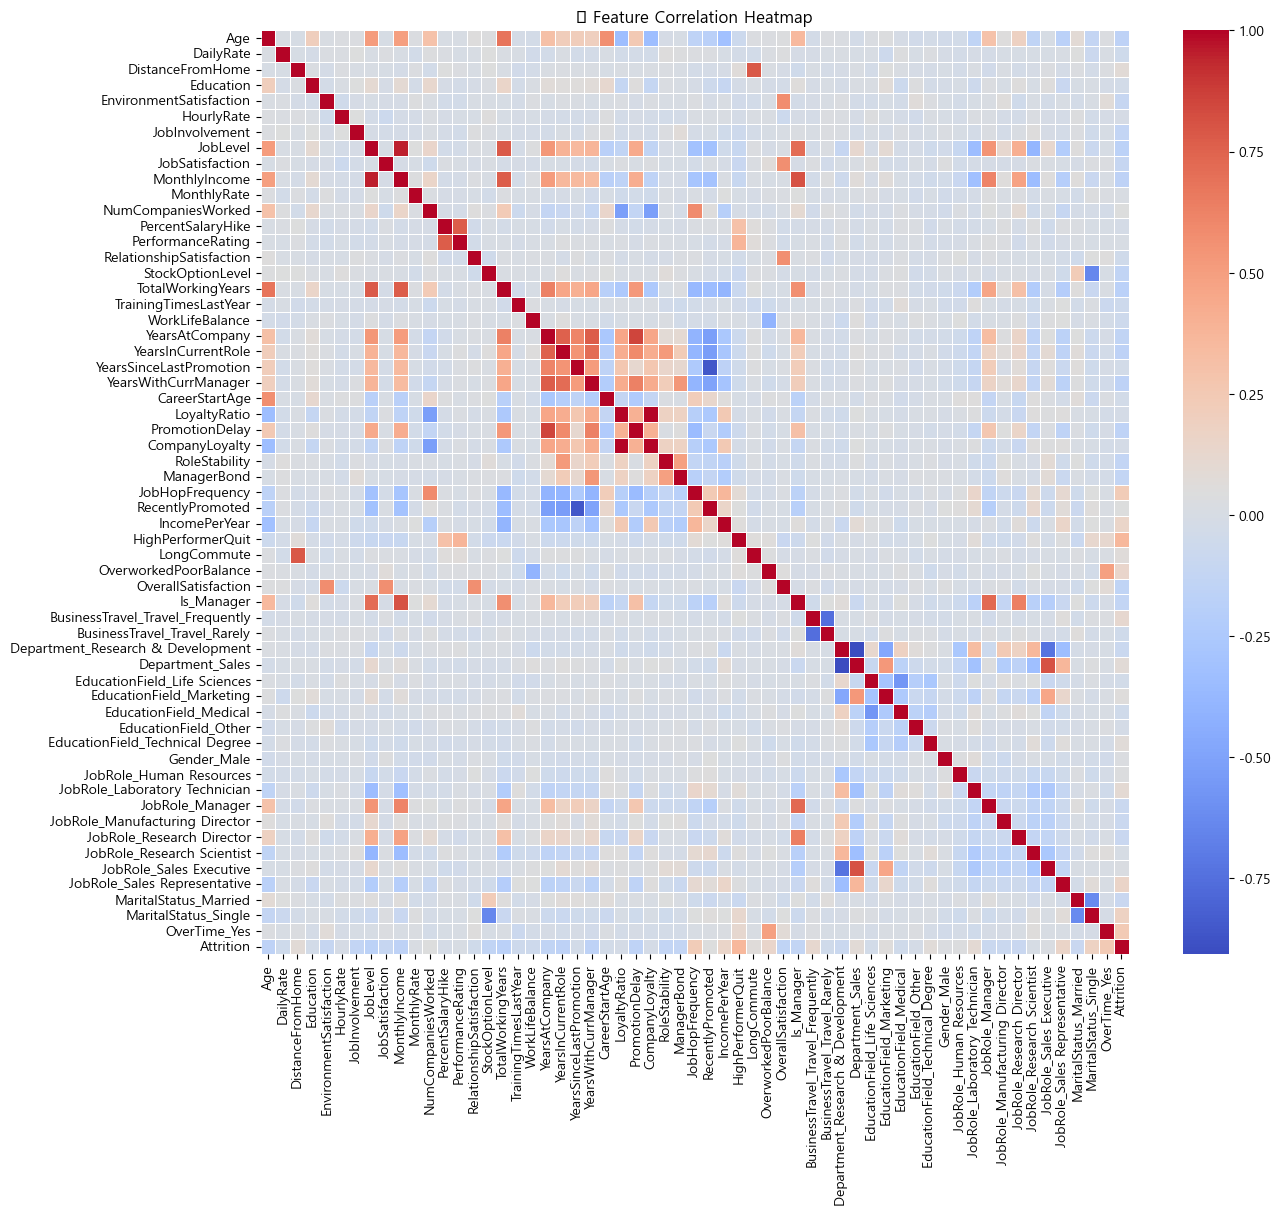

C:\Users\jhwoo\AppData\Local\Temp\ipykernel_40084\3813294372.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette='RdBu')
C:\Users\jhwoo\AppData\Local\Temp\ipykernel_40084\3813294372.py:25: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\jhwoo\anaconda3\envs\ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


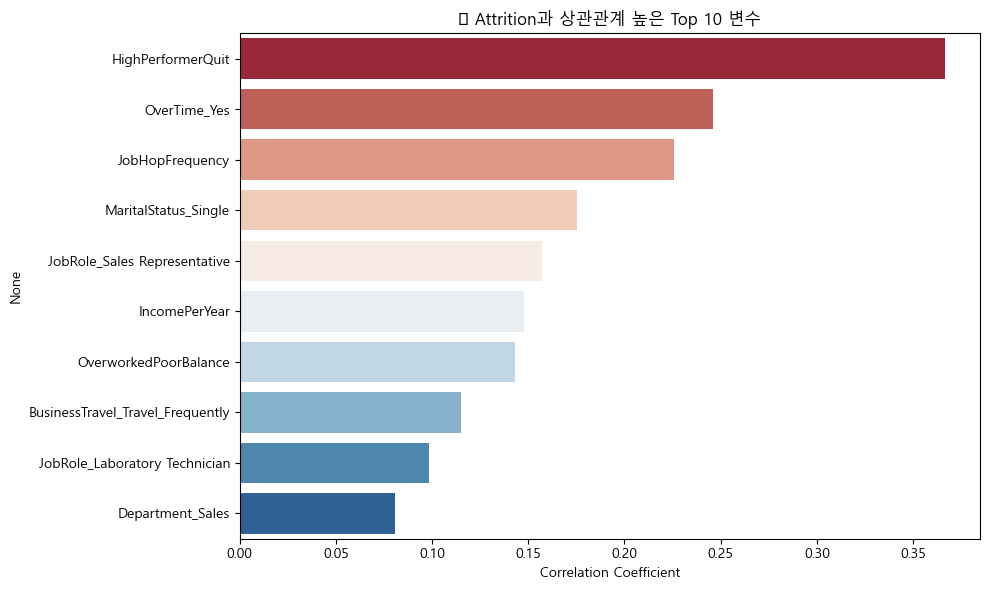

C:\Users\jhwoo\AppData\Local\Temp\ipykernel_40084\3813294372.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette='RdBu')
C:\Users\jhwoo\AppData\Local\Temp\ipykernel_40084\3813294372.py:34: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\jhwoo\anaconda3\envs\ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


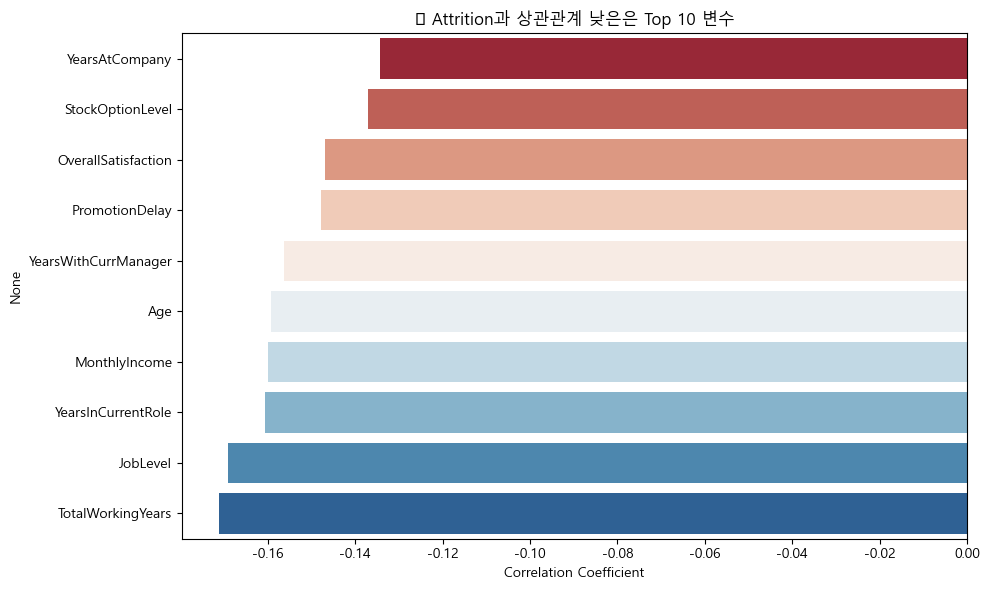

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 수치형 컬럼만 추출
numeric_features = data.select_dtypes(include=[np.number])

# 2. 상관계수 계산
corr_matrix = numeric_features.corr()

# 3. Attrition과 상관관계가 높은 순으로 정렬
target_corr = corr_matrix['Attrition'].sort_values(ascending=False)

# 4. 전체 heatmap 시각화
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('🔥 Feature Correlation Heatmap')
plt.show()

# 5. Attrition 상관계수 상위 10개만 시각화 (타겟 중심 분석)
top_corr_features = target_corr[1:11]  # 0번째는 Attrition 자기 자신
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette='RdBu')
plt.title('🎯 Attrition과 상관관계 높은 Top 10 변수')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

# 5. Attrition 상관계수 상위 10개만 시각화 (타겟 중심 분석)
top_corr_features = target_corr[-10:]  # 0번째는 Attrition 자기 자신
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette='RdBu')
plt.title('🎯 Attrition과 상관관계 낮은은 Top 10 변수')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()


In [24]:
# 5. 제거할 칼럼
drop_cols = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']
data.drop(columns=drop_cols, inplace=True)
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RoleStability,ManagerBond,JobHopFrequency,RecentlyPromoted,IncomePerYear,HighPerformerQuit,LongCommute,OverworkedPoorBalance,OverallSatisfaction,Is_Manager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,0.666667,0.833333,1.000000,1,749.125000,0,0,1,2.333333,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,0.700000,0.700000,0.100000,1,513.000000,0,0,0,3.000000,0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,0.000000,0.000000,0.857143,1,298.571429,0,0,0,3.000000,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,0.875000,0.000000,0.125000,1,363.625000,0,0,0,3.333333,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,1.000000,1.000000,1.500000,1,578.000000,0,0,0,2.333333,0


In [107]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [108]:
# ------------------------------------------------------
# 📂 0. 데이터 로드 & 초기 정리
# ------------------------------------------------------
data_path = 'data/datasets.csv'
data = pd.read_csv(data_path)

In [109]:
# 불필요한 컬럼 제거
drop_cols = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']
data.drop(columns=drop_cols, inplace=True)

In [110]:
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [ ]:
# 타겟값 변환:각 범주형 변수 수치 매핑
data['Attrition'] = data['Attrition'].map({
    'Yes': 1, 
    'No': 0
})

data['BusinessTravel'] = data['BusinessTravel'].map({
    'Non-Travel':0, 
    'Travel_Frequently':1, 
    'Travel_Rarely':2
})

data['Gender'] = data['Gender'].map({
    'Female': 0,
    'Male': 1
})

In [134]:
# 6. 컬럼 타입 나누기
numeric_features = data.select_dtypes(include=['int64', 'float64']).drop(columns=['Attrition']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)

['Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']


In [114]:
# 7. 전처리 파이프라인 구성
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ]
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# 각 모델에 대해 하이퍼파라미터 그리드 정의
param_grids = {
    # 'Logistic Regression': {
    #     'classifier__C': [0.1, 1, 10],  # 정규화 파라미터
    #     'classifier__solver': ['liblinear', 'saga']  # Solver 선택
    # },
    # 'Random Forest': {
    #     'classifier__n_estimators': [100, 200],
    #     'classifier__max_depth': [None, 10, 20],
    #     'classifier__min_samples_split': [2, 5]
    # },
    # 'Gradient Boosting': {
    #     'classifier__n_estimators': [100, 200],
    #     'classifier__learning_rate': [0.01, 0.1, 0.5],
    #     'classifier__max_depth': [3, 5, 7]
    # },
    'Naive Bayes': {
        'classifier__var_smoothing': [1e-9, 1e-8, 1e-7]
    },
    'XGBoost': {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__max_depth': [3, 6]
    },
    'LightGBM': {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__num_leaves': [31, 50]
    }
}

cat_params={
    'CatBoost': {
        'classifier__iterations': [100, 200],
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__depth': [3, 5, 7]
    }
}

# 8. 전체 파이프라인 구성
lr_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=3000))
])

rf_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

gb_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])

nb_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

xgb_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])

lgbm_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(verbosity=-1))
])

cat_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(verbose=False))
])

In [129]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# 전처리 구성
preprocessor_for_tree_models = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),  # Tree는 scaling 필요 없음
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)

preprocessor_for_nb = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)

# Gaussian Naive Bayes 파이프라인
nb_clf = Pipeline(steps=[
    ('preprocessor', preprocessor_for_nb),
    ('classifier', GaussianNB())
])

# XGBoost
xgb_clf = Pipeline(steps=[
    ('preprocessor', preprocessor_for_tree_models),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# LightGBM
lgbm_clf = Pipeline(steps=[
    ('preprocessor', preprocessor_for_tree_models),
    ('classifier', LGBMClassifier(verbosity=-1))
])

# CatBoost - ❗️전처리 없이 바로 raw categorical 처리
# → 따로 OneHot 안 함. 따로 preprocessor 필요 없음.
cat_clf = CatBoostClassifier(verbose=False)

# 예: 훈련 시 cat_features 명시
# cat_clf.fit(X_train, y_train, cat_features=cat_feature_indices)


In [130]:
# 9. 데이터 분리
X = data.drop(columns='Attrition')
y = data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=13)


In [ ]:
# 10. 학습 및 예측
# clf_list = [lr_clf, rf_clf, gb_clf, nb_clf, xgb_clf, lgbm_clf, cat_clf]
clf_list = [nb_clf, xgb_clf, lgbm_clf]
best_acc = 0.0
best_clf = None
best_model_name = ""
best_params = {}
categorical_features = ['Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']

# 2. GridSearchCV를 사용한 모델 학습 및 하이퍼파라미터 튜닝
for clf, model_name in zip(clf_list, param_grids.keys()):
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grids[model_name], cv=5, scoring='recall' , verbose=1)
    if clf is cat_clf:
        grid_search.fit(X_train, y_train,cat_features=categorical_features)
    else:
        grid_search.fit(X_train, y_train)
    
    # 가장 좋은 성능의 모델과 파라미터 저장
    if grid_search.best_score_ > best_acc:  
        best_acc = grid_search.best_score_
        best_clf = grid_search.best_estimator_
        best_model_name = model_name
        best_params = grid_search.best_params_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\Users\jhwoo\anaconda3\envs\ml\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:26:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\jhwoo\anaconda3\envs\ml\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:26:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\jhwoo\anaconda3\envs\ml\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:26:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\jhwoo\anaconda3\envs\ml\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:26:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" }

Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\Users\jhwoo\anaconda3\envs\ml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jhwoo\anaconda3\envs\ml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jhwoo\anaconda3\envs\ml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jhwoo\anaconda3\envs\ml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\jhwoo\anaconda3\envs\ml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.w

Fitting 5 folds for each of 12 candidates, totalling 60 fits


ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jhwoo\anaconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jhwoo\anaconda3\envs\ml\Lib\site-packages\catboost\core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_model,
  File "c:\Users\jhwoo\anaconda3\envs\ml\Lib\site-packages\catboost\core.py", line 2395, in _fit
    train_params = self._prepare_train_params(
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jhwoo\anaconda3\envs\ml\Lib\site-packages\catboost\core.py", line 2321, in _prepare_train_params
    _check_train_params(params)
  File "_catboost.pyx", line 6601, in _catboost._check_train_params
  File "_catboost.pyx", line 6623, in _catboost._check_train_params
_catboost.CatBoostError: catboost/private/libs/options/plain_options_helper.cpp:512: Unknown option {classifier__learning_rate} with value "0.01"

--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jhwoo\anaconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jhwoo\anaconda3\envs\ml\Lib\site-packages\catboost\core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_model,
  File "c:\Users\jhwoo\anaconda3\envs\ml\Lib\site-packages\catboost\core.py", line 2395, in _fit
    train_params = self._prepare_train_params(
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jhwoo\anaconda3\envs\ml\Lib\site-packages\catboost\core.py", line 2321, in _prepare_train_params
    _check_train_params(params)
  File "_catboost.pyx", line 6601, in _catboost._check_train_params
  File "_catboost.pyx", line 6623, in _catboost._check_train_params
_catboost.CatBoostError: catboost/private/libs/options/plain_options_helper.cpp:512: Unknown option {classifier__learning_rate} with value "0.1"


In [ ]:
# 3. 최적의 모델로 예측 및 평가
y_pred = best_clf.predict(X_test)
y_proba = best_clf.predict_proba(X_test)[:, 1]  # Yes일 확률

# 평가 출력
print(f"Best Model: {best_model_name}")
print(f"Best Hyperparameters: {best_params}")
print(classification_report(y_test, y_pred))
print("==============================")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("==============================")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")

Best Model: Logistic Regression
Best Hyperparameters: {'classifier__C': 0.1, 'classifier__solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       247
           1       0.82      0.38      0.52        47

    accuracy                           0.89       294
   macro avg       0.86      0.68      0.73       294
weighted avg       0.88      0.89      0.87       294

Accuracy: 0.8877551020408163
ROC AUC: 0.8344


In [ ]:
# ------------------------------------------------------
# ⚙️ 10. 컬럼 타입 분리
# ------------------------------------------------------
numeric_features = data.select_dtypes(include=['int64', 'float64']).drop(columns=['Attrition']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

In [119]:
from sklearn.metrics import classification_report, roc_auc_score

# 확률 예측 (Attrition=1일 확률)
y_proba = best_clf.predict_proba(X_test)[:, 1]
def evaluate_threshold(y_true, y_proba, threshold=0.5):
    y_pred = (y_proba >= threshold).astype(int)
    print(f"🔻 Threshold = {threshold:.3f}")
    print(f"accuracy:{accuracy_score(y_test,y_pred)}")
    # print(classification_report(y_true, y_pred, zero_division=0))
    # print(f"ROC-AUC: {roc_auc_score(y_true, y_proba):.4f}")
for t in [0.3, 0.35, 0.4, 0.45, 0.5]:
    evaluate_threshold(y_test, y_proba, threshold=t)


🔻 Threshold = 0.300
accuracy:0.8605442176870748
🔻 Threshold = 0.350
accuracy:0.8707482993197279
🔻 Threshold = 0.400
accuracy:0.8673469387755102
🔻 Threshold = 0.450
accuracy:0.8843537414965986
🔻 Threshold = 0.500
accuracy:0.8877551020408163
